**<h1><center>Tasty Bytes Web Traffic Prediction</center></h1>**

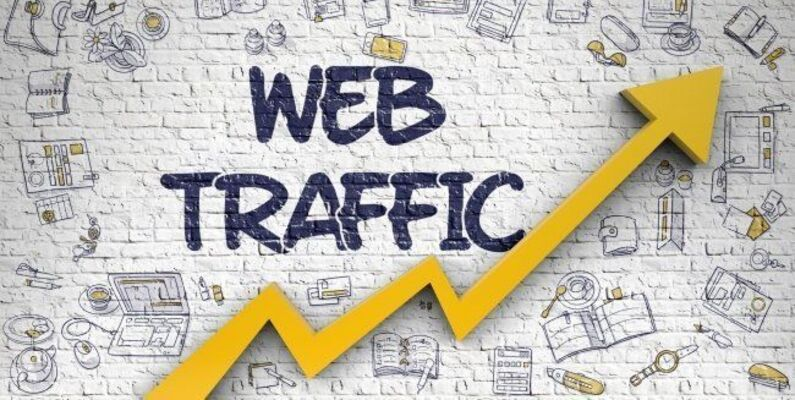

In [1498]:

from IPython.display import Image
image_path = "cover.jpg"
# Display the image
Image(filename=image_path)

### Table Of Content
* 1 Introduction
* 2 Libraries & Configuration
  * 2.1 Libraries
  * 2.2 Configuration
* 3 Data Validation and Cleaning
  * 3.1 Data Validation
  * 3.2 Data cleaning
* 4 EXploratory Data Analysis
  * 4.1 Target Variable
  * 4.2 Numerical Variable
      * 4.2.1 Relationship between Calories and protein
      * 4.2.2 Distribution bwteen numeric variable and Traffic
  * 4.3 Categorical Variables
* 5 Model fitting and Evaluation
  * 5.1 Data Pre-processing
  * 5.2 Logistic Regression
  * 5.3 Random Forest
  * 5.4 Model Evaluation
* 6 Insights
  * 6.1 Business Metrics
  * 6.2 Recommendation

  

# 1. Introduction

In the contemporary landscape of data-centric business strategies, companies are increasingly leveraging analytical insights to enhance their operational efficiency and drive financial growth. This report aims to conduct a comprehensive analysis of user-generated data from the Tasty Bytes website. Our primary objective is to unearth pivotal trends in user engagement with the site's recipe content and identify the recipes that contribute to increased website traffic.

### Objectives of This Analysis:

- Develop a predictive model to ascertain which recipes are likely to attract high traffic.
- Achieve a prediction accuracy rate of at least 80% for identifying high-traffic recipes.

### Data Sources:

For this endeavor, we will extract data directly from the Tasty Bytes website. The dataset encompasses a variety of metrics, including recipe details, nutritional content (calories, carbohydrates, sugar, protein), culinary category, number of servings, and the high-traffic designation for each recipe.

### Summary :
The logistic regression and random forest models showed promising results, with precision scores of 0.82 and ROC AUC of 0.83, indicating they are capable of predicting high-traffic recipes with high accuracy. This aligns well with the business’s goal of achieving at least 80% accuracy in predictions.


# 2 Libraries & Configurations

### 2.1 Libraries
Loading the relevant libraries and user-defined functions

In [1499]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from scipy import stats     # for statistics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### 2.2 Configurations
Setting the configurations to be used for our analysis.

In [1500]:
# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid")

# 3. Data Validation and Cleaning
This data set has 947 rows and 8 columns.


In [1501]:
#loading the dataframe
df= pd.read_csv('recipe_site_traffic_2212.csv')
#viewing the dataframe
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [1502]:
#cheking information on the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [1503]:
#checking statistical information about the numeric colunms
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


### 3.1 Data Validation

- Validating Recipe column

The data validation step has verified that the ‘recipe’ column exclusively contains unique identifiers, ensuring there are no duplicate entries within this field.

In [1504]:
#validating recipe colunm for 947 unique recipe identifiers
df['recipe'].nunique()

947

In [1505]:
#validating the numeric data type of the recipe column
df['recipe'].dtype

dtype('int64')

- Validating Calories column

The validation process confirmed that the dataset for calorie content is indeed comprised of numeric data types, ensuring its suitability for quantitative analysis

In [1506]:
#validating the numeric data type
df['calories'].dtype

dtype('float64')

- Validating the Carbonhydrate column

The validation process confirmed that the dataset for carbonhydrate content is indeed comprised of numeric data types, ensuring its suitability for quantitative analysis

In [1507]:
#validating the numeric data type
df['carbohydrate'].dtype

dtype('float64')

- Validating the Sugar column

The validation process confirmed that the dataset for sugar content is indeed comprised of numeric data types, ensuring its suitability for quantitative analysis

In [1508]:
#validating the numeric data type
df['sugar'].dtype


dtype('float64')

- Validating the protein column

The validation process confirmed that the dataset for protein content is indeed comprised of numeric data types, ensuring its suitability for quantitative analysis.

In [1509]:
#validating the numeric data type
df['protein'].dtype

dtype('float64')

- Validating the category column

During the data validation phase, it was noted that there were 11 categories of recipes present, contrary to the expected 10. The category labeled as “chicken breast” was identified as a redundant category and has been consolidated under the broader ‘chicken’ category to streamline the dataset.

In [1510]:
#validating the object data type
df['category'].dtype

dtype('O')

In [1511]:
#validating the 10 number of categories
df['category'].nunique()

11

In [1512]:
#checking the 11 types of category 
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [1513]:
#maping chicken Breast to Chicken
df['category'] = df['category'].replace({'Chicken Breast': 'Chicken'})

- Validating the Servings column

During the validation process, it was discovered that the ‘servings’ column contained data of the object type, including some incorrectly labeled entries. These errors have been rectified, and the column’s data type has been converted to a numeric type to ensure accuracy in the analysis.

In [1514]:
#validating the numeric data type
df['servings'].dtype

dtype('O')

In [1515]:
#checking data entry
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [1516]:
#maping the incorrect entries
df['servings'] = df['servings'].replace({'4 as a snack': '4','6 as a snack': '6'})

In [1517]:
#changing the object data type to numeric datatype
df['servings']=df['servings'].astype('int64')

- Validating the High_Traffic column

Upon validation, it was found that the ‘high_traffic’ column contains entries labeled as ‘High’ and some missing values represented by ‘nan’. These missing values have been reclassified as ‘Low’ to maintain data consistency for subsequent analysis.

In [1518]:
#Validating the "High" entry
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [1519]:
#maping nan to low
df['high_traffic'] = df['high_traffic'].fillna('Low')

### 3.2 Data Cleaning
An observed trend indicates that the columns for calories, carbohydrates, sugar, and protein frequently exhibit missing data concurrently within the same rows. To enhance the precision of the analysis, these instances of incomplete data have been excluded from the dataset.

In [1520]:
#checking for missing data
df.isnull().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [1521]:
#checking the pattern of the missing data
df[df['calories'].isnull()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [1522]:
#drop rows with missing values
df.dropna(inplace=True)

In [1523]:
#drop recipe column due to its being a unique identifier
df=df.drop('recipe',axis=1)

# 4.0 Exploratory Data Analysis

I have investigated the target variable and features of the dataset and the relationship between target variable and features. After the analysis,I have come to the following conlussion.

- High Traffic Segment: Dominated by recipes with higher protein content and diverse serving sizes, indicating protein may be a significant factor in recipe popularity.

- Low Traffic Segment: Slightly more sugar content in recipes but with no clear nutritional trends affecting traffic, highlighting potential areas for improvement in recipe design to boost traffic.

- Recipe Preferences: Chicken is a universally popular ingredient, but high traffic is particularly driven by potato and vegetable recipes. Beverage recipes have the least traffic, suggesting a focus area for enhancement.

### 4.1 Target Variable- High_traffic  

The variable ‘high_traffic’ is designated as the target variable for our predictive analysis. It is essential for gauging the popularity of recipes, as it measures the amount of web traffic they generate. The data indicates that recipes falling into the ‘high traffic’ segment account for 60% of our dataset, a distribution that is visually represented in the accompanying bar and pie charts.

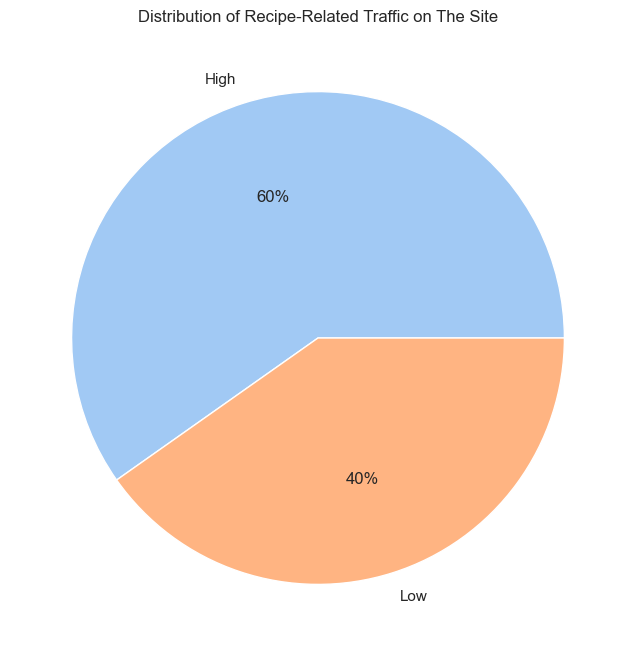

In [1524]:
#checking the distribution of high and low customer traffic on the website with a bar chart
df_event=df["high_traffic"].value_counts().reset_index()
# Renaming columns for clarity
df_event.columns = ['Web Traffic', 'Frequency']
#checking the distribution of high and low customer traffic on the website with a pie chart
data = df_event['Frequency']
labels = df_event['Web Traffic']
# Defining Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(labels)]
# Creating the  pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Distribution of Recipe-Related Traffic on The Site')
plt.show()

### 4.2 Numeric Variables - calories,carbohydrate,sugar,protein,servings  

THe heatmap shows the correlation coefficients between the nutritional variables of calories, carbohydrate, sugar, protein, and servings. Here’s a summary of the insights:

- Calories and Protein: There is a slight positive correlation (0.17), indicating that higher protein may be associated with higher calorie count.

- Sugar and Servings: There is a very weak negative correlation (-0.0086), suggesting almost no relationship between sugar content and serving size.

- Other Variables: The correlations between other variable pairs are relatively low, with most values being close to zero, indicating a weak or no linear relationship.


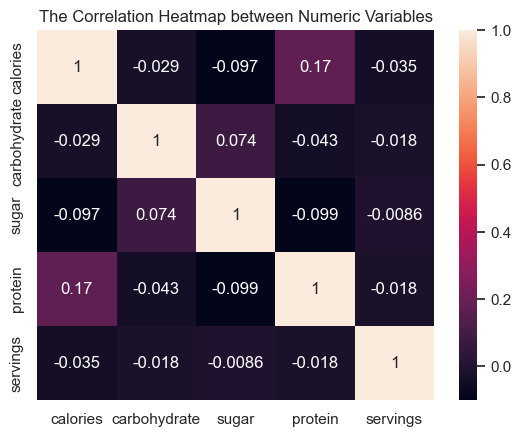

In [1525]:
numeric = df[['calories','carbohydrate','sugar','protein','servings']]
sns.heatmap(numeric.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables')
plt.show()

#### 4.2.1 Relationship Between Calories and Protein  

The scatter plot illustrates the relationship between protein intake (in grams) and calorie intake. Here’s what the scatter plot indicates:

- Protein Intake Range: From 0 to approximately 350 grams.

- Calorie Intake Range: From 0 to about 3500 calories.

There seems to be a positive trend, where higher protein intake is associated with higher calorie intake, although the relationship is not strictly linear.Most data points are clustered in the lower range for both protein and calorie intake, with fewer points at higher levels.

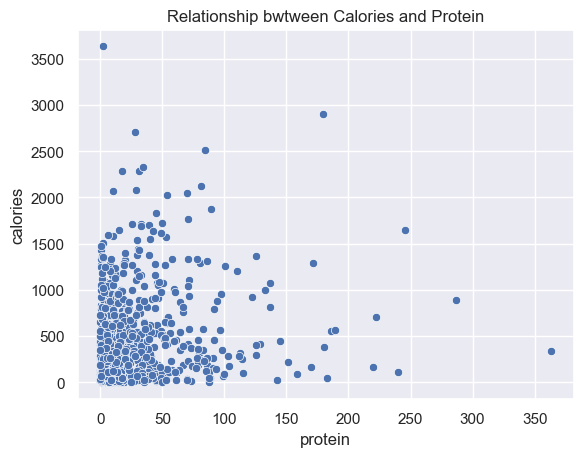

In [1526]:
sns.scatterplot(y='calories',x='protein',data=df).set(title='Relationship bwtween Calories and Protein')
plt.show()

#### 4.2.2 Distribution of Numeric variables by Traffic

The box plot suggests the following about the relationship between traffic and nutritional content:

- Servings: Higher traffic is associated with a wider range of servings, indicating variability in consumer preferences.

- Sugar: Slightly higher median for low traffic, with outliers on both ends, indicating no clear trend.

- Carbohydrates: Similar medians for both traffic groups, with a slightly wider range for low traffic.

- Protein: Higher median for high traffic, suggesting a positive relationship between protein content and traffic.

- Calories: Wide range for both high and low traffic, with several outliers, especially at lower calorie counts for high traffic, indicating variability.

Overall, protein content seems to have a positive correlation with higher traffic, while other nutrients show no clear trends based on these plots alone. The presence of outliers suggests that there are items that deviate significantly from the general pattern.

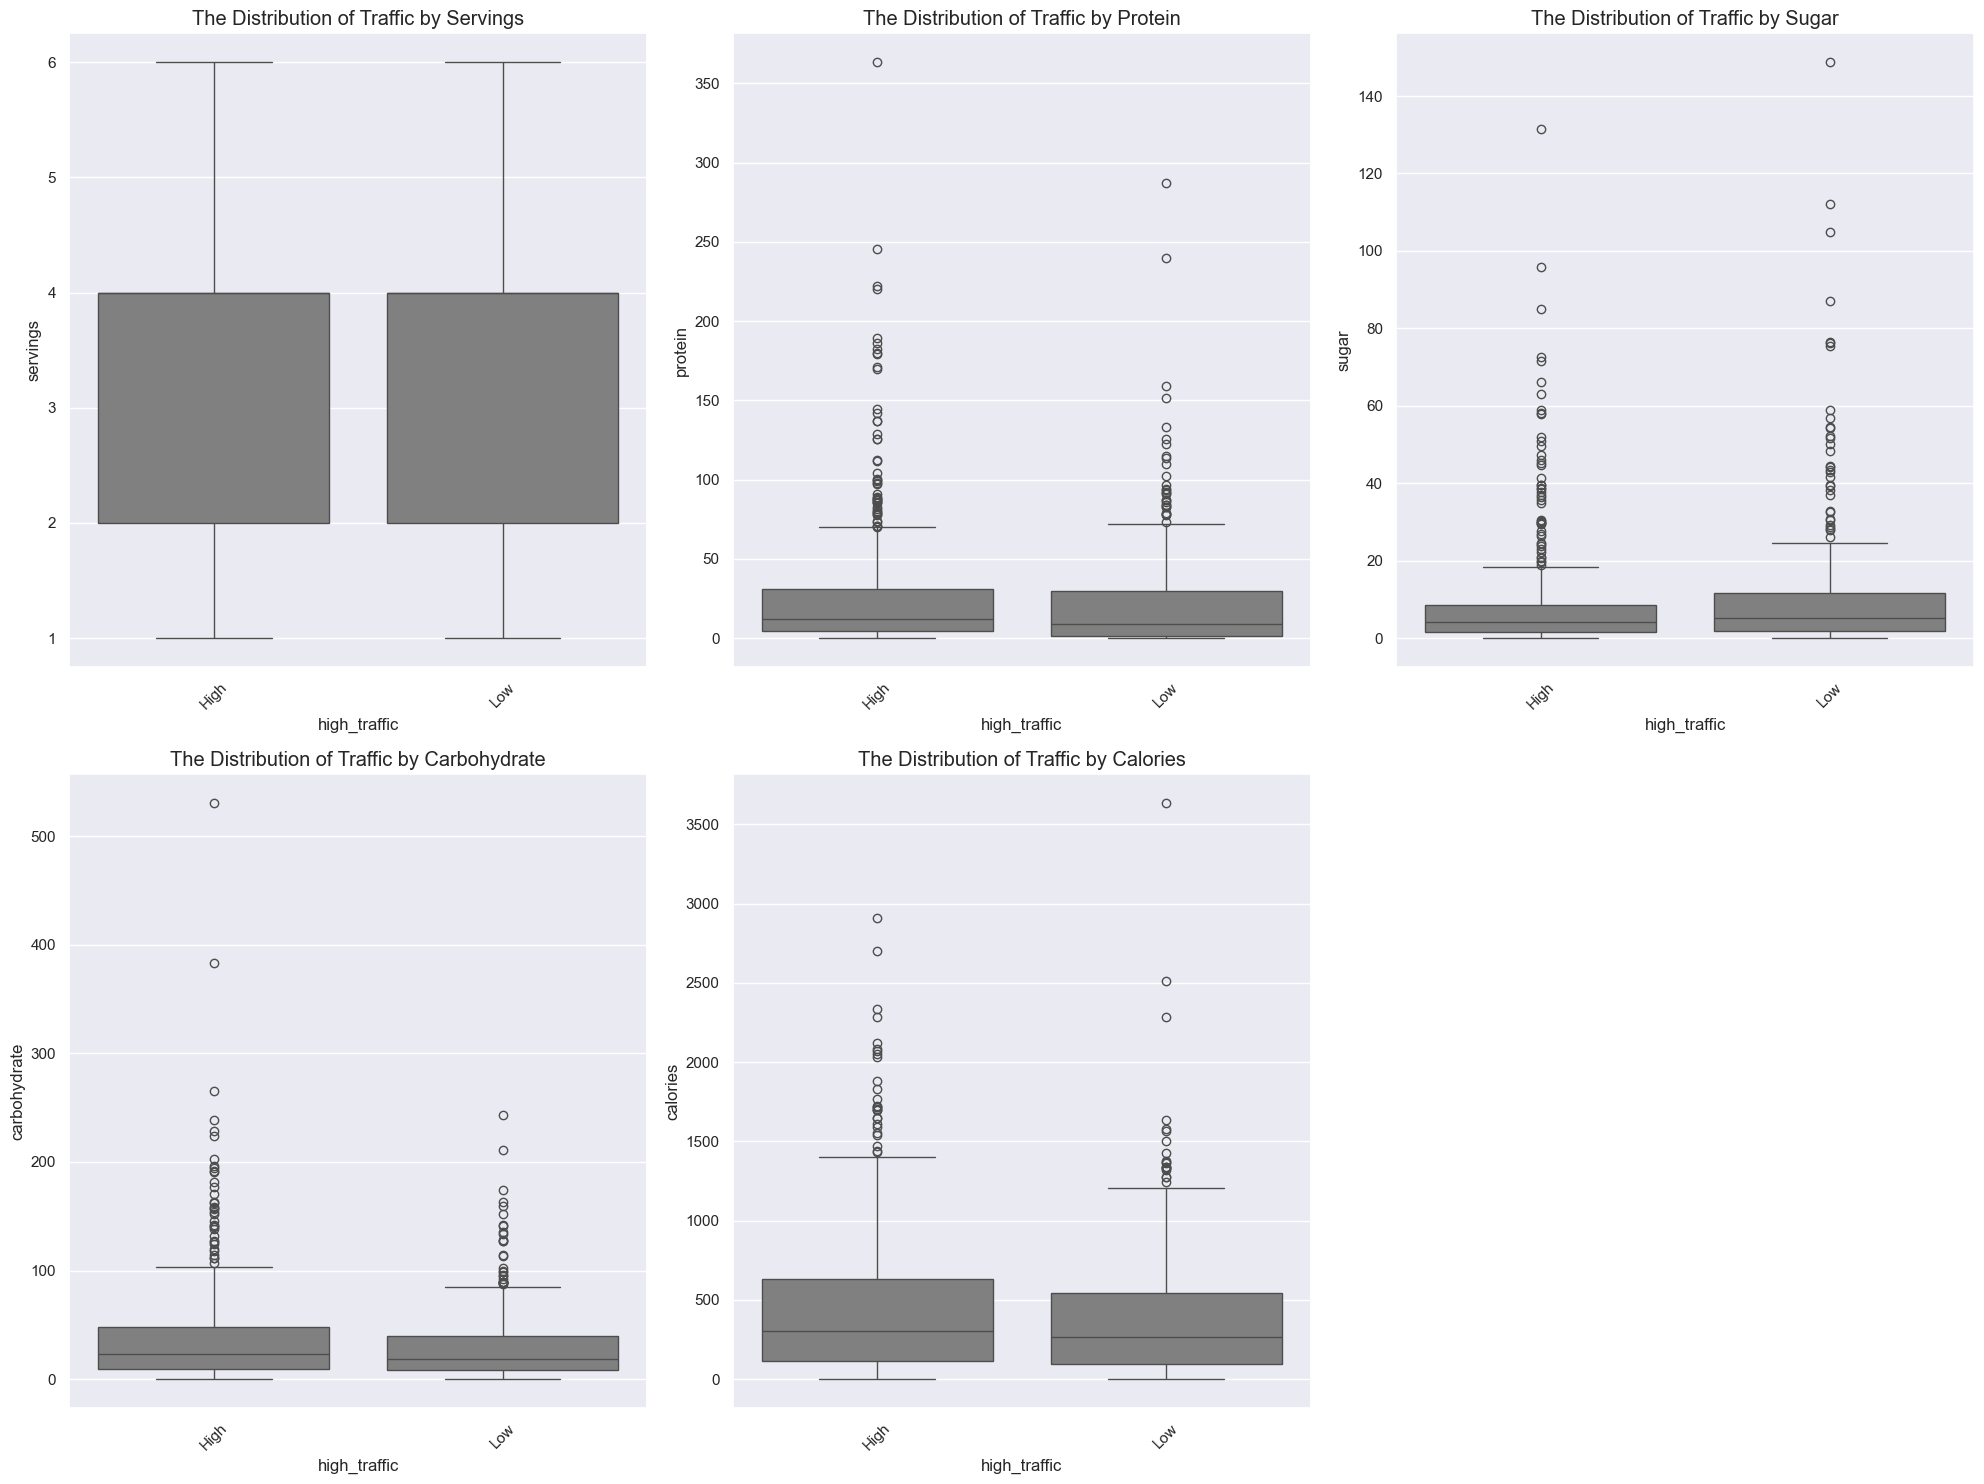

In [1527]:
import matplotlib.pyplot as plt
import seaborn as sns

nutritional_components = ['servings', 'protein', 'sugar', 'carbohydrate', 'calories']
titles = ['The Distribution of Traffic by Servings', 'The Distribution of Traffic by Protein',
          'The Distribution of Traffic by Sugar', 'The Distribution of Traffic by Carbohydrate',
          'The Distribution of Traffic by Calories']

fig, axes = plt.subplots(2, 3, figsize=(20, 15)) 

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Creating the boxplots
for i, (component, title) in enumerate(zip(nutritional_components, titles)):
    sns.boxplot(data=df, y=component, x='high_traffic', color='gray', ax=axes_flat[i])
    axes_flat[i].set_title(title, fontsize='large')  # Set the correct title
    axes_flat[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels to 45 degrees

# Remove the empty subplot (if any)
for i in range(len(nutritional_components), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()


### 4.3 Categorical Variables - category

The count plot of recipe types for various traffic groups indicates the following:

- High Traffic Preferences: potato recipes are the most popular, followed by vegetables and chicken. Beverages have the lowest count, suggesting they are less associated with high traffic.
- Low Traffic Preferences: Chicken leads but with a slightly higher count than in the high traffic group. Other categories like meat have lower counts compared to high traffic.

Overall Trends: The preference for chicken is consistent across both traffic groups, but other recipe types vary, reflecting different consumer interests or seasonal trends that could affect traffic with patato leading in the higher traffic count.


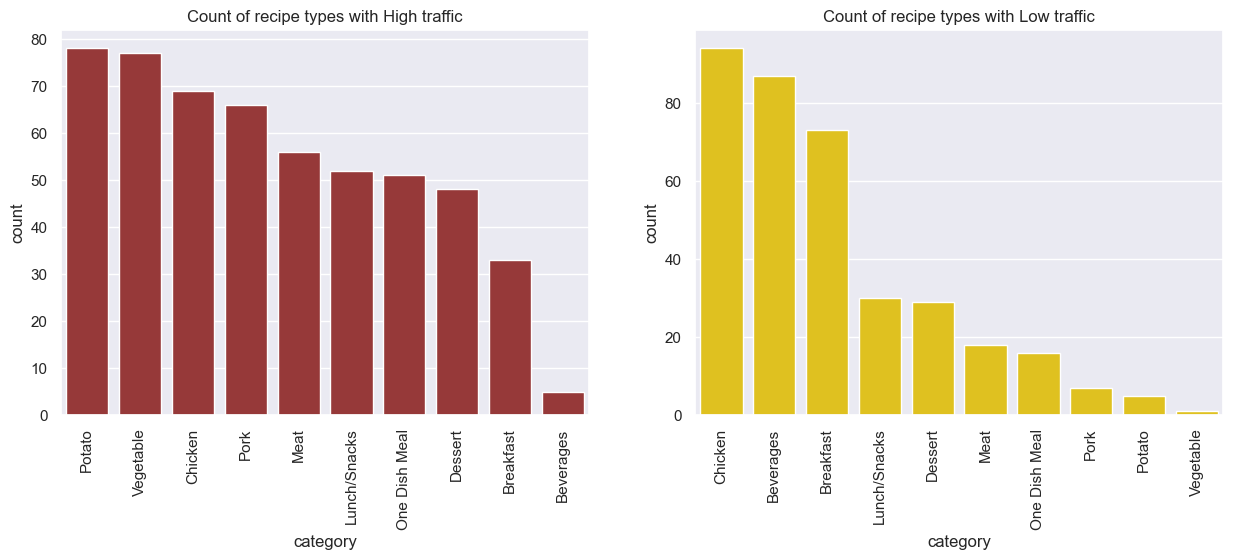

In [1528]:
#comparing recipe type with high and low traffic
fig, axes = plt.subplots(1,2,figsize=(15,5))
df_high= df[df["high_traffic"]=='High']
df_low= df[df["high_traffic"]=='Low']
sns.countplot(x=df_high['category'],ax=axes[0],color='brown',order=df_high['category'].value_counts(ascending=False).index).set(title='Count of recipe types with High traffic')
sns.countplot(x=df_low['category'],ax=axes[1],color='gold',order=df_low['category'].value_counts(ascending=False).index).set(title='Count of recipe types with Low traffic')
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
plt.show()

# 5.0 Model Fitting & Evaluation

Predicting web traffic is a classification problem that can be effectively addressed with logistic regression in machine learning. I have selected Logistic Regression as my foundational model. For comparison, I am employing the Random Forest classifier, which is adept at managing outliers and capturing complex, non-linear patterns.

For model evaluation, I am prioritizing the Precision metric because it reduces the occurrence of false positives, ensuring that when a recipe is forecasted to have high traffic, it is indeed highly probable.

### 5.1 Data Pre-Processing
For the modeling process, we’ve selected features such as calories, carbohydrates, sugar, protein, servings, and category, with High_traffic as the target variable. The following preprocessing steps have been implemented:

- The Target variable has been binarized into 1s and 0s.

- Categorical variables have been transformed into numerical features.

- Numerical features have been normalized.

- The dataset has been divided into training and test sets for model validation.

#### Target Column

In [1529]:
#mapping the target variable

df['high_traffic'] = df['high_traffic'].map({'High': 1, 'Low': 0}
)

#### Feature Columns

- One Hot encoding

In [1530]:
#applying one-hot encoding
df=pd.get_dummies(df,dtype=int,prefix='',prefix_sep='')

#### Train-Test Split

In [1531]:
#defining the Target and features
y= df['high_traffic'].values
X= df.drop('high_traffic',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=SEED)

#### Normalization

In [1532]:
#Normalization of the freatures using a StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### 5.2 Logistic Regression Model
The baseline Logistic Regression Model, upon evaluation, achieved a precision score of 0.82 and a Receiver Operating Characteristic (ROC) - Area Under Curve (AUC) score of 0.84.

In [1533]:
#Expatiating the Logistic regression model
logreg=LogisticRegression()
#Training our model on the training set
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [1534]:
# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
print("Log Loss: {:.2f}".format(log_loss(y_test, y_pred_proba)))



Confusion Matrix:
 [[ 80  28]
 [ 35 126]]
Accuracy: 0.77
Precision: 0.82
Recall: 0.78
F1 Score: 0.80
AUC: 0.84
Log Loss: 0.48


In [1535]:
# Extract the coefficients from the logistic regression model
coef = logreg.coef_

# Get the feature names after dropping the target column
col = df.drop("high_traffic", axis=1).columns

# Create a DataFrame to display the coefficients
# For binary classification, the index is usually a single element list
df_coef = pd.DataFrame(coef, index=['high_traffic'], columns=col)

# Display the DataFrame
df_coef


,calories,carbohydrate,sugar,protein,servings,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
high_traffic,0.05325,0.02972,-0.083374,0.043812,0.053029,-0.981299,-0.491236,-0.397499,-0.044768,-0.065308,0.108229,0.115617,0.4372,0.579131,0.942304


{'calories': -0.010631544832256635, 'carbohydrate': -0.0022184666452272793, 'sugar': -0.0031581835503896706, 'protein': 0.00047400556880443644, 'servings': -0.005793799552832868, 'Beverages': 0.1297745687200756, 'Breakfast': 0.060250628802090235, 'Chicken': 0.037717801952705333, 'Dessert': -0.0013435820953079602, 'Lunch/Snacks': -0.0005012986535279151, 'Meat': 0.0018774582743148916, 'One Dish Meal': 0.00013421990683708528, 'Pork': 0.0031033973152239324, 'Potato': 0.014563989862525351, 'Vegetable': 0.018809734983587033}


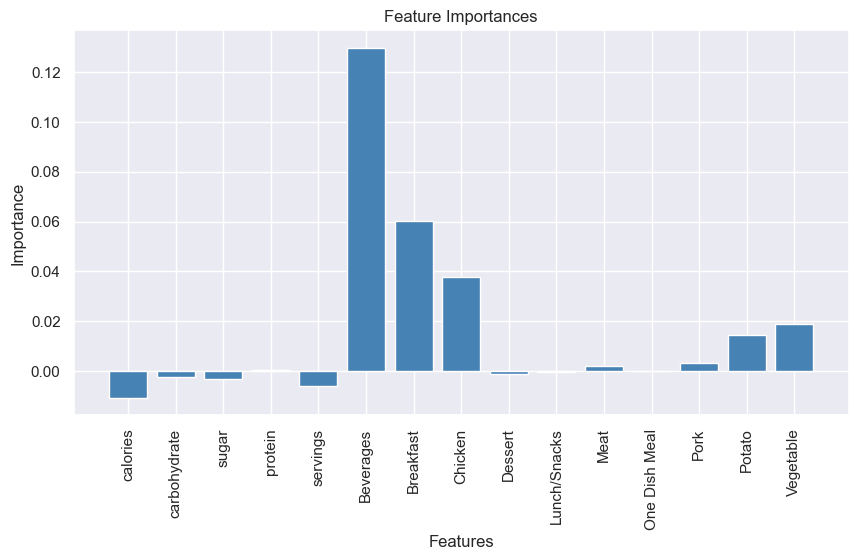

In [1536]:
#Checking our most important feature
result = permutation_importance(logreg, X_test_scaled, y_test,scoring='f1_weighted', n_repeats=10, random_state=42, n_jobs=2)

# Get importance
importances = result.importances_mean
# Print the feature importance
feature_importance = {feature: importance for feature, importance in zip(col, importances)}

# Now feature_importance is a dictionary where the key is the feature name and the value is the importance
print(feature_importance)
features = list(feature_importance.keys())
importances = list(feature_importance.values())
# Create the bar plot
plt.figure(figsize=(10, 5))  # Optional: You can set the figure size
plt.bar(features, importances, color='steelblue')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### 5.4 Random Forest Model
Upon evaluation with the precision metric, the Random Forest Model registered a score of 0.82 and achieved a Receiver Operating Characteristic (ROC) - Area Under Curve (AUC) score of 0.83

In [1537]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=55,max_depth=7,min_samples_leaf=1,random_state=SEED)
# Fit the model to your data
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=7, n_estimators=55, random_state=42)

Confusion Matrix:
 [[ 78  30]
 [ 28 133]]
Accuracy: 0.78
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
AUC: 0.83
Log Loss: 0.51


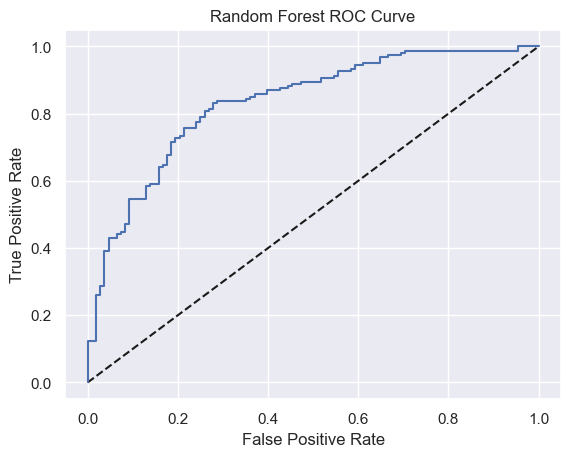

In [1538]:
# Predictions
y_pred = rf.predict(X_test_scaled)
y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
print("Log Loss: {:.2f}".format(log_loss(y_test, y_pred_proba)))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

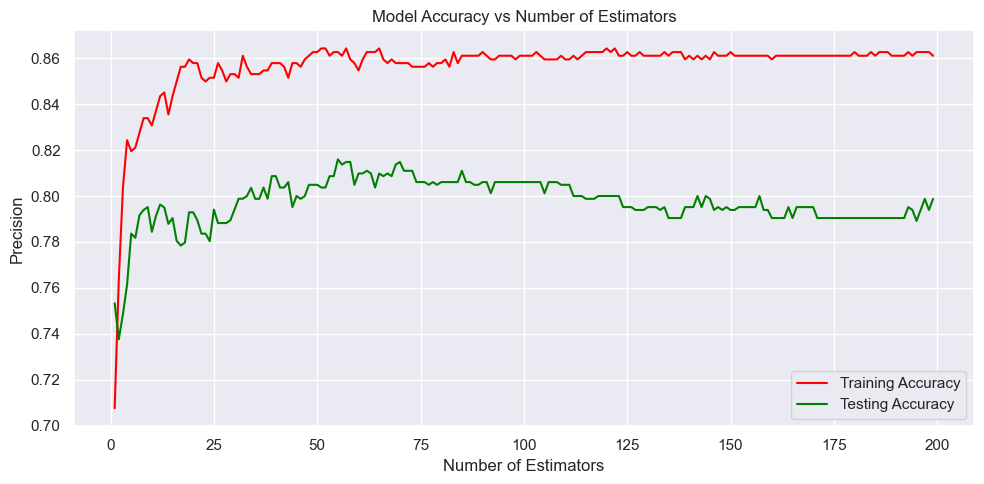

Best n_estimators: 55
Best max_depth: 7
Testing precision Score with best n_estimators and max_depth: 0.8


In [1539]:
# Initialize lists to store scores
train_scores = []
test_scores = []
max_accuracy = 0
best_n_estimators = 0
best_max_depth = 0

# Store best accuracies for plotting
best_train_scores = []
best_test_scores = []

# Loop over depths from 1 to 9
for j in range(1, 10):
    for i in range(1, 200):
        # Initialize and fit the RandomForestClassifier
        rf = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=SEED)
        rf.fit(X_train_scaled, y_train)
        
        # Predict and calculate scores
        train_accuracy = rf.score(X_train_scaled, y_train)
        y_pred = rf.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_pred)
        
        # Append scores to lists
        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)
        
        # Update max accuracy and corresponding depth
        if test_accuracy > max_accuracy:
            max_accuracy = test_accuracy
            best_n_estimators = i
            best_max_depth = j

# Fix max_depth at the best found value, and vary n_estimators
for i in range(1, 200):
    rf = RandomForestClassifier(n_estimators=i, max_depth=best_max_depth, random_state=SEED)
    rf.fit(X_train_scaled, y_train)
    
    train_accuracy = rf.score(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    test_accuracy = precision_score(y_test, y_pred)
    
    best_train_scores.append(train_accuracy)
    best_test_scores.append(test_accuracy)

# Plotting the accuracy scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 200), best_train_scores, label='Training Accuracy', color='red')
plt.plot(range(1, 200), best_test_scores, label='Testing Accuracy', color='green')
plt.title('Model Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'Testing precision Score with best n_estimators and max_depth: {round(max_accuracy,1)}')


### 5.5 Model Evaluation
The base Logistic Regression and Random Forest models both exhibit a Precision score of 0.82, demonstrating their effectiveness in predicting high-traffic recipes. The AUC-ROC scores are comparable, with the Logistic Regression model slightly outperforming the Random Forest model with scores of 0.84 to 0.83, respectively. This indicates that both models possess a good level of separability, which means they are adept at distinguishing between recipes that will have high or low web traffic, significantly surpassing the threshold of random chance.

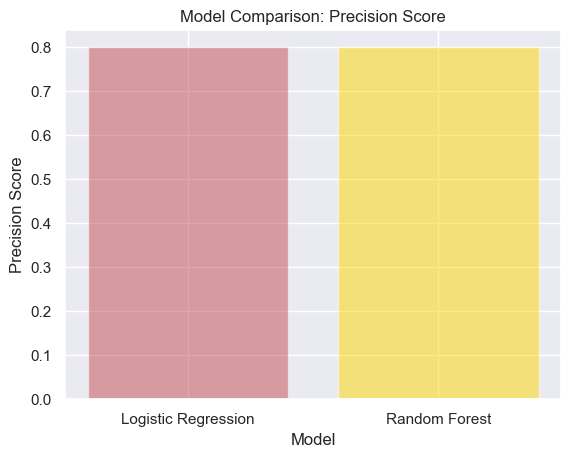

In [1540]:

# Calculate precision scores
precision_logreg = precision_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)

# Data for plotting
models = ['Logistic Regression', 'Random Forest']
precision_scores = [precision_logreg, precision_rf]

# Plotting
plt.bar(models, precision_scores, color=['r', 'gold'],alpha=0.5)

# Labels and titles
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Model Comparison: Precision Score')

plt.show()


# 6.0 Insights

#### 6.1 Business Metric

Tasty Bytes aims to predict which recipes will garner high traffic with at least 80% accuracy. The key business metric for monitoring this objective is the accuracy of predictions, with a special focus on the precision of forecasting high-traffic recipes, as it directly correlates with the success of content on the website.

- The business should consistently track the precision score of the model’s predictions to measure how frequently the high-traffic recipe predictions are correct.

- Considering that both the logistic model and random forest have precision scores of 0.82 and ROC AUC of 0.83, it’s advisable to set an initial precision target a bit lower, around 0.75-0.80, to allow for any potential overfitting or shifts in data trends once the model is operational.

- With ongoing data collection, Tasty Bytes can fine-tune this target based on real-world performance and evolving business requirements. Should the models regularly hit or surpass the set precision score, it would be prudent to increase the target to mirror advancements in model accuracy or shifts in business strategies.

#### 6.2 Recommendations

Summary: 

The logistic regression and random forest models have shown promising results, with precision scores of 0.82 and ROC AUC of 0.83, indicating they are capable of predicting high-traffic recipes with high accuracy. This aligns well with the business’s goal of achieving at least 80% accuracy in predictions.

Recommendations:

- Implement Monitoring: Set up a system to regularly evaluate the precision of the models’ predictions, focusing on high-traffic recipe predictions.

- Set Initial Metric Targets: Begin with an initial precision target of 0.75-0.80, which is slightly conservative compared to your current model performance, to ensure reliability in a production environment.

- Collect and Analyze Data: Continuously collect data on predicted vs actual traffic to recipes to further refine the models and adjust the precision target as needed.

- Consider Broader Metrics: Beyond precision, also monitor user engagement metrics like click-through and conversion rates to get a holistic view of performance.

- Iterate and Improve: Use new data to retrain and improve your models periodically, ensuring they adapt to changes in user preferences and content trends.

By following these recommendations, the business can effectively monitor and capitalize on high-traffic recipe predictions, driving better content strategy decisions.
